In [83]:
# 导入工具包 numpy pandas用于数据处理  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
#读取数据，并删除前3列
df = pd.read_excel('data.xlsx')
df=df.iloc[:,1:]
df.tail()

,数管分系统/次,载荷分系统/次,电源分系统/次,姿态控制分系统/次,热控分系统/次,数传和测控分系统/次,推进分系统/次,故障类别
360,3,2,2,1,6,1,4,2
361,0,1,3,1,3,0,0,1
362,1,6,6,0,5,0,2,0
363,0,0,2,2,4,1,0,2
364,0,3,7,0,6,4,0,0


In [85]:
#删除数据的缺失值
df1=df.dropna()
df1.tail()

,数管分系统/次,载荷分系统/次,电源分系统/次,姿态控制分系统/次,热控分系统/次,数传和测控分系统/次,推进分系统/次,故障类别
360,3,2,2,1,6,1,4,2
361,0,1,3,1,3,0,0,1
362,1,6,6,0,5,0,2,0
363,0,0,2,2,4,1,0,2
364,0,3,7,0,6,4,0,0


In [86]:
#描述一下数据的统计信息，可以清楚的看到有没有异常值
df1.describe()

,数管分系统/次,载荷分系统/次,电源分系统/次,姿态控制分系统/次,热控分系统/次,数传和测控分系统/次,推进分系统/次,故障类别
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1.526027,1.597260,1.364384,0.536986,1.605479,1.430137,1.260274,0.506849
std,1.756466,1.556445,1.917629,0.862450,2.120795,1.584149,1.429933,0.661402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,3.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000
max,7.000000,7.000000,8.000000,3.000000,9.000000,4.000000,4.000000,2.000000


In [87]:
#划分特征 与 标签 展现下数据形状
df2=df1
y=df2['故障类别']
y=y[1:,]
x=df2.iloc[:-1,:]
x=x.values
y=y.values
x.shape,y.shape

((364, 8), (364,))

In [106]:
#划分训练集测试集，取10%的测试集。
from sklearn.model_selection import train_test_split
train_data,test_data, train_labels, test_labels = train_test_split(x,
                                                   y,
                                                   test_size = 0.02,
                                                   random_state = 0)
len(test_data)#看一下测试集长度

8

[ 0.0077097   0.02963553  0.         -0.          0.04554515  0.
  0.         -0.        ]


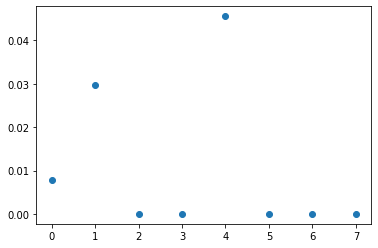

In [107]:
#特征选择 最后选择第1,2,5个特征
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.05)
lasso.fit(train_data, train_labels)
print(lasso.coef_)
plt.plot(lasso.coef_,'o', label = 'linear regression')
index=lasso.coef_>0
coef=[int(i) for i in index]
train_data=train_data*coef
test_data=test_data*coef

训练集:
预测正确数量,训练集样本量:
210 356
精确度等指标：
              precision    recall  f1-score   support

           0       0.60      0.95      0.73       207
           1       0.50      0.10      0.17       116
           2       1.00      0.03      0.06        33

    accuracy                           0.59       356
   macro avg       0.70      0.36      0.32       356
weighted avg       0.60      0.59      0.49       356

混淆矩阵：
[[197  10   0]
 [104  12   0]
 [ 30   2   1]]
测试集:
预测正确数量,测试集样本量:
5 8
精确度等指标：
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.62         8
   macro avg       0.24      0.28      0.26         8
weighted avg       0.54      0.62      0.58         8

混淆矩阵：
[[5 1 0]
 [1 0 0]
 [1 0 0]]
在训练集上的预测效果:


E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


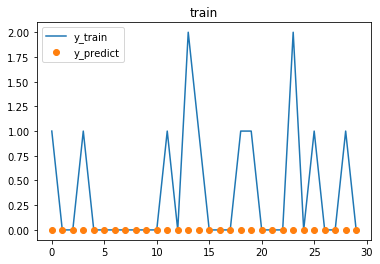

在测试集上的预测效果:


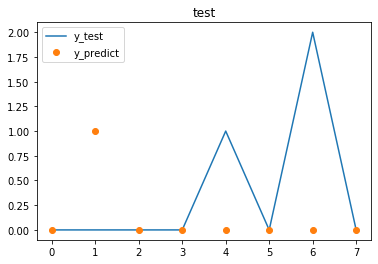

In [108]:
# 支持向量机SVM
from sklearn.svm import SVC  
from sklearn import metrics
model = SVC(gamma='auto') 
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

E:\anoconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


训练集:
预测正确数量,训练集样本量:
206 356
精确度等指标：
              precision    recall  f1-score   support

           0       0.59      0.97      0.73       207
           1       0.38      0.04      0.08       116
           2       0.00      0.00      0.00        33

    accuracy                           0.58       356
   macro avg       0.32      0.34      0.27       356
weighted avg       0.47      0.58      0.45       356

混淆矩阵：
[[201   6   0]
 [111   5   0]
 [ 31   2   0]]
测试集:
预测正确数量,测试集样本量:
6 8
精确度等指标：
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.75         8
   macro avg       0.25      0.33      0.29         8
weighted avg       0.56      0.75      0.64         8

混淆矩阵：
[[6 0 0]
 [1 0 0]
 [1 0 0]]
在训练集上的预测效果:


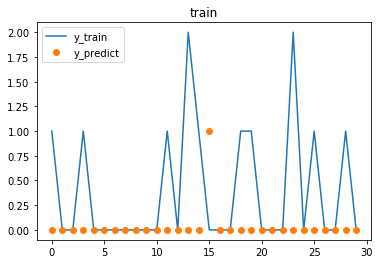

在测试集上的预测效果:


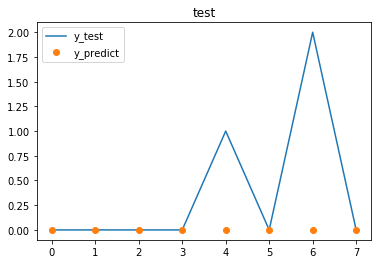

In [109]:
#线性支持向量机SVM
from sklearn.svm import LinearSVC
model = LinearSVC() 
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()

训练集:
预测正确数量,训练集样本量:
206 356
精确度等指标：
              precision    recall  f1-score   support

           0       0.58      0.98      0.73       207
           1       0.38      0.03      0.05       116
           2       0.00      0.00      0.00        33

    accuracy                           0.58       356
   macro avg       0.32      0.34      0.26       356
weighted avg       0.46      0.58      0.44       356

混淆矩阵：
[[203   4   0]
 [113   3   0]
 [ 32   1   0]]
测试集:
预测正确数量,测试集样本量:
5 8
精确度等指标：
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.62         8
   macro avg       0.24      0.28      0.26         8
weighted avg       0.54      0.62      0.58         8

混淆矩阵：
[[5 1 0]
 [1 0 0]
 [1 0 0]]
在训练集上的预测效果:


E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


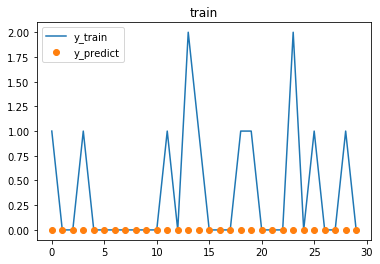

在测试集上的预测效果:


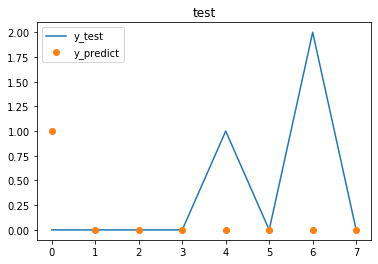

In [110]:
#随机森林方法
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()


训练集:
预测正确数量,训练集样本量:
206 356
精确度等指标：
              precision    recall  f1-score   support

           0       0.59      0.97      0.73       207
           1       0.38      0.04      0.08       116
           2       0.00      0.00      0.00        33

    accuracy                           0.58       356
   macro avg       0.32      0.34      0.27       356
weighted avg       0.47      0.58      0.45       356

混淆矩阵：
[[201   6   0]
 [111   5   0]
 [ 31   2   0]]
测试集:
预测正确数量,测试集样本量:
6 8
精确度等指标：
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.75         8
   macro avg       0.25      0.33      0.29         8
weighted avg       0.56      0.75      0.64         8

混淆矩阵：
[[6 0 0]
 [1 0 0]
 [1 0 0]]
在训练集上的预测效果:


E:\anoconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anoconda\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


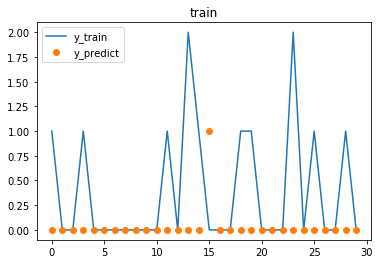

在测试集上的预测效果:


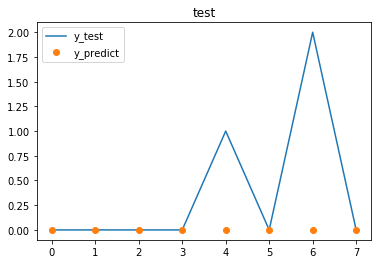

In [111]:
#logistic回归
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,multi_class='auto',l1_ratio=0.01)
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()


E:\anoconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


训练集:
预测正确数量,训练集样本量:
215 356
精确度等指标：
              precision    recall  f1-score   support

           0       0.62      0.92      0.74       207
           1       0.51      0.20      0.29       116
           2       0.67      0.06      0.11        33

    accuracy                           0.60       356
   macro avg       0.60      0.39      0.38       356
weighted avg       0.59      0.60      0.53       356

混淆矩阵：
[[190  17   0]
 [ 92  23   1]
 [ 26   5   2]]
测试集:
预测正确数量,测试集样本量:
5 8
精确度等指标：
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.62         8
   macro avg       0.24      0.28      0.26         8
weighted avg       0.54      0.62      0.58         8

混淆矩阵：
[[5 1 0]
 [1 0 0]
 [1 0 0]]
在训练集上的预测效果:


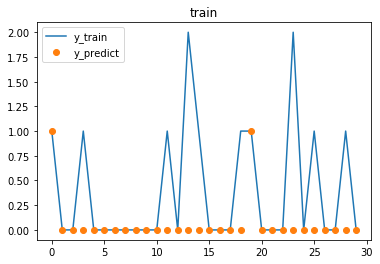

在测试集上的预测效果:


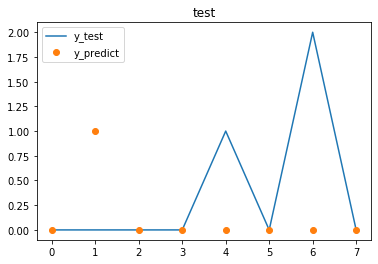

In [112]:
#神经网络分类方法
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()


E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anoconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\anoconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-sc

训练集:
预测正确数量,训练集样本量:
209 356
精确度等指标：
              precision    recall  f1-score   support

           0       0.59      0.99      0.74       207
           1       0.50      0.04      0.08       116
           2       0.00      0.00      0.00        33

    accuracy                           0.59       356
   macro avg       0.36      0.34      0.27       356
weighted avg       0.51      0.59      0.45       356

混淆矩阵：
[[204   3   0]
 [111   5   0]
 [ 31   2   0]]
测试集:
预测正确数量,测试集样本量:
5 8
精确度等指标：
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.62         8
   macro avg       0.24      0.28      0.26         8
weighted avg       0.54      0.62      0.58         8

混淆矩阵：
[[5 1 0]
 [1 0 0]
 [1 0 0]]
在训练集上的预测效果:


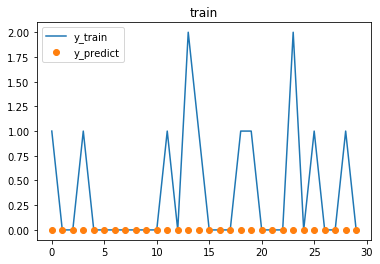

在测试集上的预测效果:


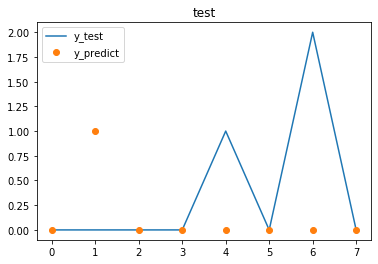

In [113]:
#用上面三种效果最好的算法集成 得到的投票分类算法
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(max_depth=2, random_state=0)
clf2 = MLPClassifier()
clf3 = LogisticRegression(random_state=0,multi_class='auto',)
model = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')#hard
model.fit(train_data,train_labels)
predict_target=model.predict(train_data)
print("训练集:")
print("预测正确数量,训练集样本量:")
print(sum(predict_target == train_labels),len(train_labels))
print("精确度等指标：")
print(metrics.classification_report(train_labels,predict_target))
print("混淆矩阵：")
print(metrics.confusion_matrix(train_labels,predict_target))
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

#在训练集上的预测效果,
print("在训练集上的预测效果:")
plt.plot(train_labels[20:50]) 
plt.plot(predict_target[20:50],'o')
plt.legend(('y_train','y_predict'))
plt.title('train')
plt.show()

#在训练集上的预测效果
print("在测试集上的预测效果:")
plt.plot(test_labels) 
plt.plot(predict_target2,'o')
plt.legend(('y_test','y_predict'))
plt.title('test')
plt.show()